In [1]:
# loading packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# loading dataset
df_bean = pd.read_excel(r'C:/Users/giese/Desktop/outros_projetos/Projetos-python/Dry_bean/Dry_Bean_Dataset.xlsx')

In [3]:
# first 5 values from dataset
df_bean.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [4]:
# geral info
df_bean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [5]:
# checking NA values
df_bean.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [6]:
df_bean["Class"].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

<AxesSubplot:title={'center':'Major axis & Minor axis length per bean'}, xlabel='MajorAxisLength', ylabel='MinorAxisLength'>

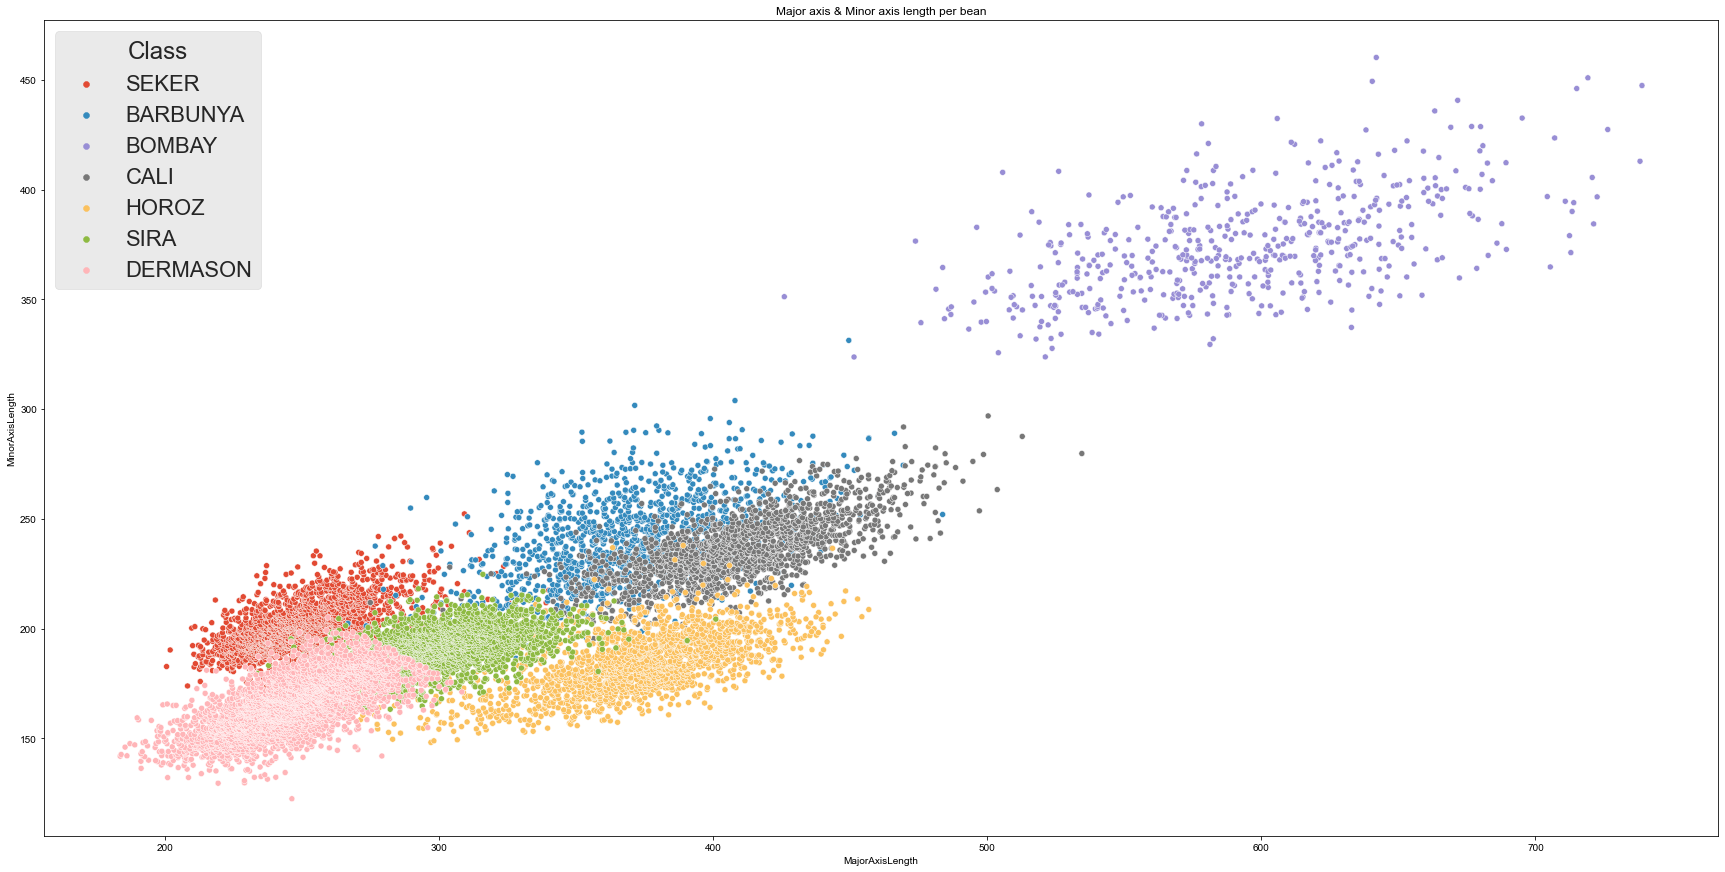

In [7]:
# Major & minor axis length per bean plot
plt.figure(figsize = (30,15))
plt.title('Major axis & Minor axis length per bean')
sns.set(font_scale = 2)
plt.style.use("ggplot")
sns.scatterplot(data = df_bean , x = "MajorAxisLength", y = "MinorAxisLength", hue = "Class")

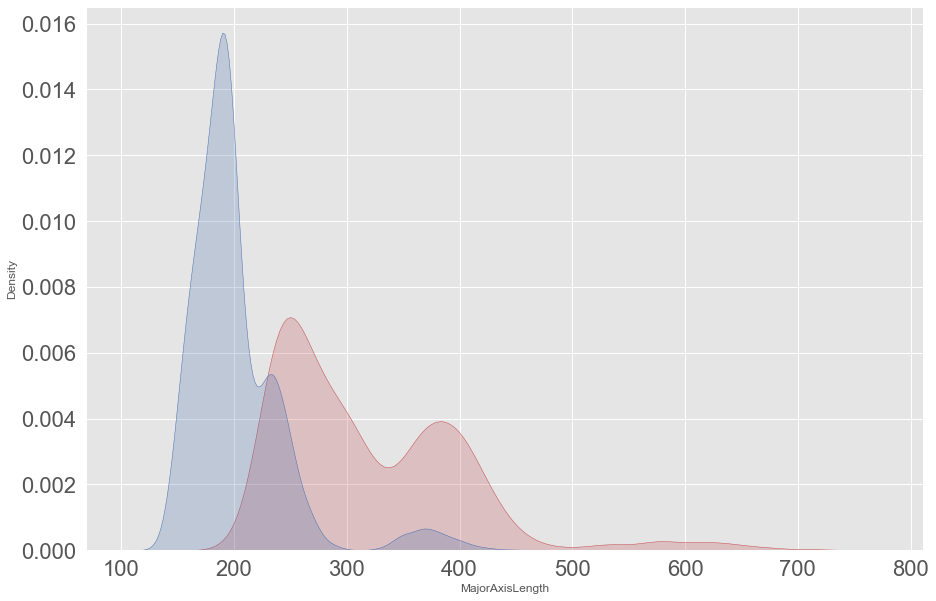

In [8]:
# Major & minor axis length density plot
fig, ax = plt.subplots(figsize = (15, 10))
sns.set(font_scale = 2)
plt.style.use("ggplot")
fig = sns.kdeplot(df_bean["MajorAxisLength"], shade = True, color = "r")
fig = sns.kdeplot(df_bean["MinorAxisLength"], shade = True, color = "b")
plt.show()

<AxesSubplot:xlabel='Perimeter', ylabel='Density'>

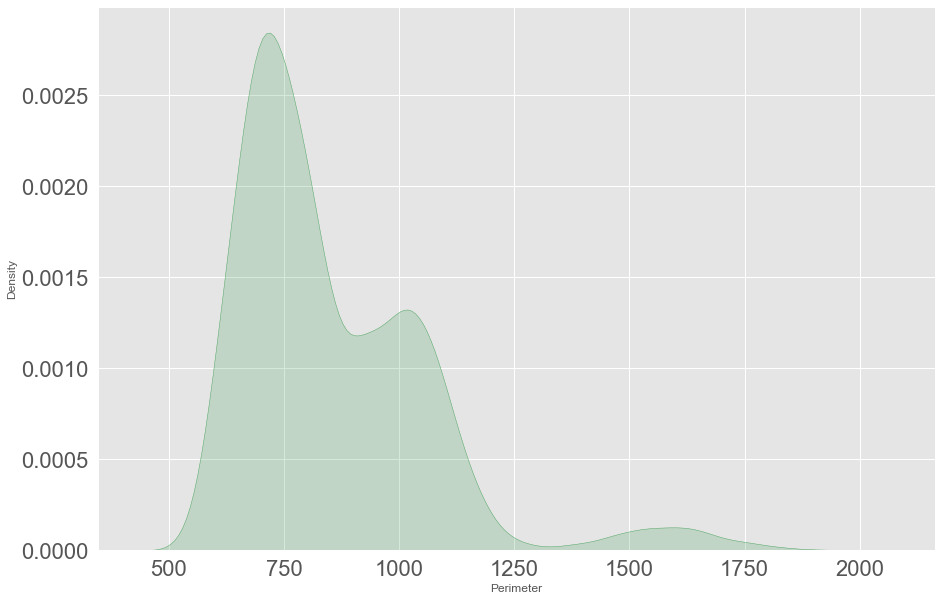

In [9]:
# Perimeter density plot
fig, ax = plt.subplots(figsize = (15, 10))
sns.set(font_scale = 2)
plt.style.use("ggplot")
sns.kdeplot(df_bean["Perimeter"], shade = True, color = "g")

<AxesSubplot:xlabel='Area', ylabel='Density'>

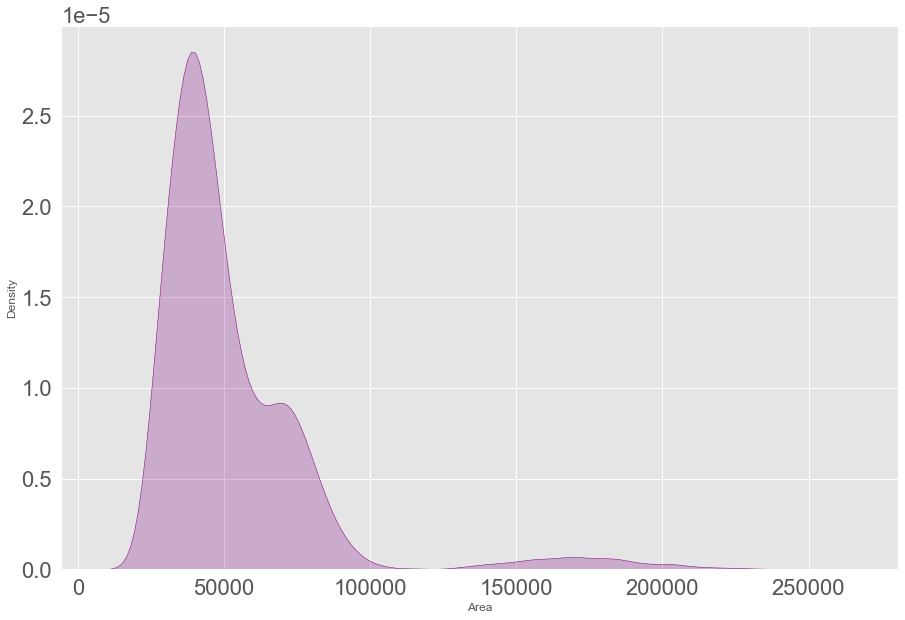

In [10]:
# Area density plot
fig, ax = plt.subplots(figsize = (15, 10))
sns.set(font_scale = 2)
plt.style.use("ggplot")
sns.kdeplot(df_bean["Area"], shade = True, color = "purple")

<AxesSubplot:xlabel='ShapeFactor1', ylabel='Density'>

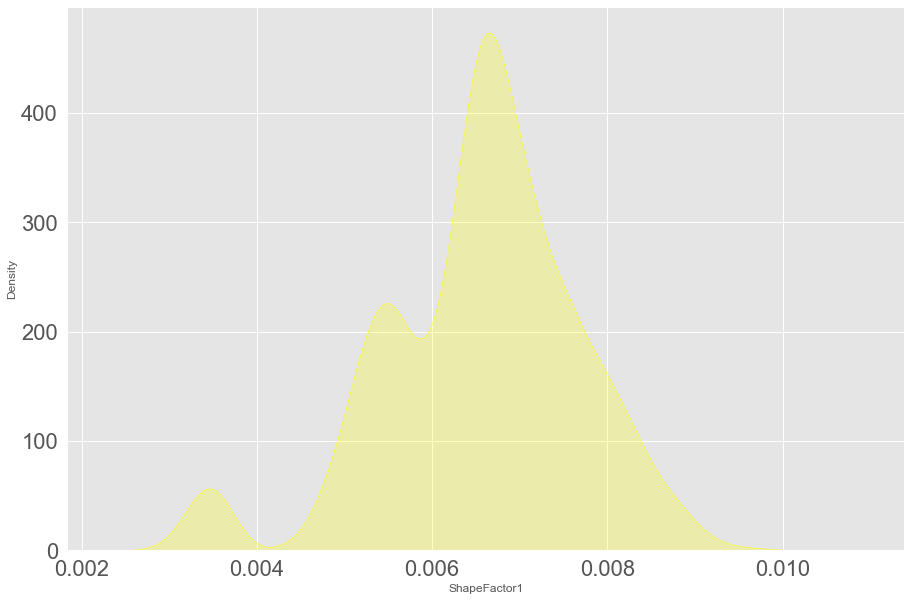

In [11]:
# Shape factor 1 density plot
fig, ax = plt.subplots(figsize = (15, 10))
sns.set(font_scale = 2)
plt.style.use("ggplot")
sns.kdeplot(df_bean["ShapeFactor1"], shade = True, color = "yellow")

<AxesSubplot:xlabel='ShapeFactor2', ylabel='Density'>

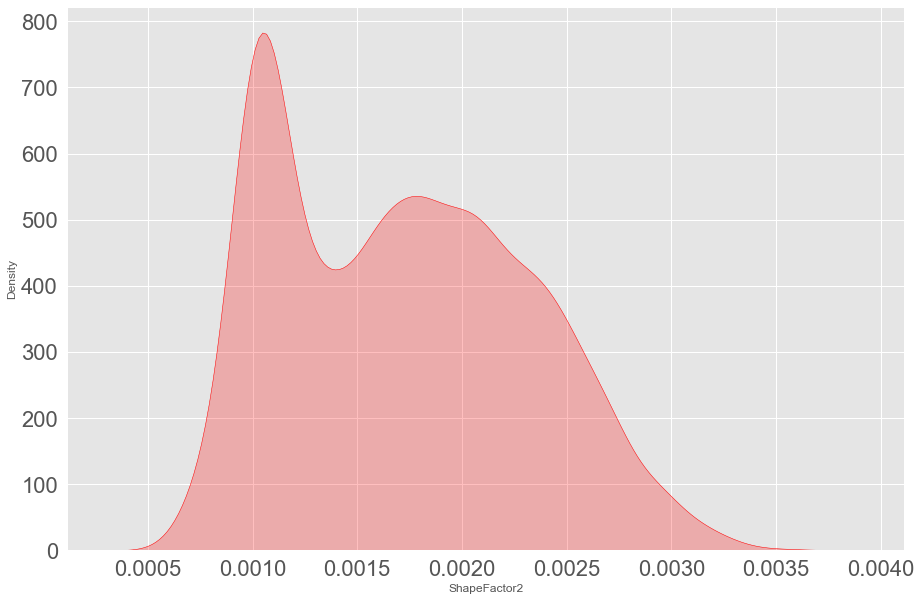

In [12]:
# Shape factor 2 density plot
fig, ax = plt.subplots(figsize = (15, 10))
sns.set(font_scale = 2)
plt.style.use("ggplot")
sns.kdeplot(df_bean["ShapeFactor2"], shade = True, color = "red")

<AxesSubplot:xlabel='ShapeFactor3', ylabel='Density'>

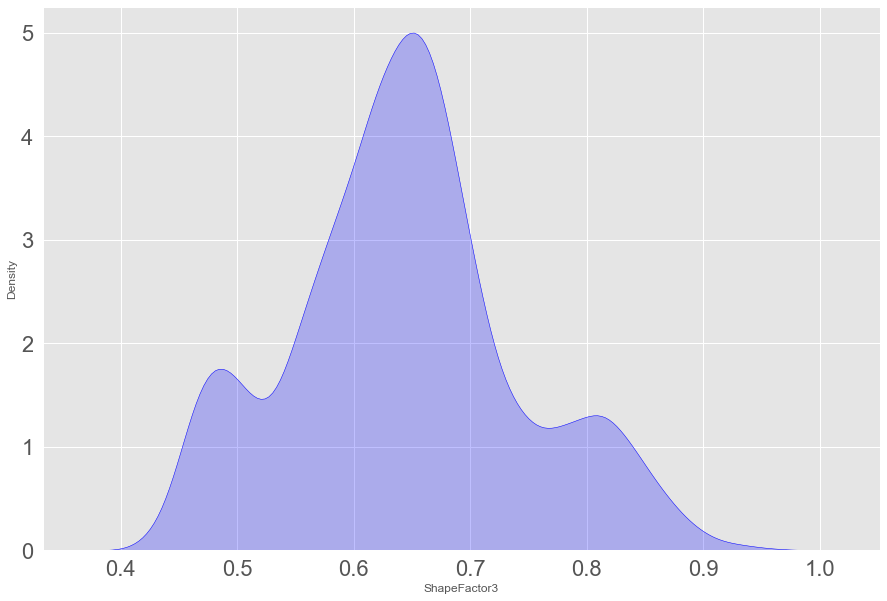

In [13]:
# Shape factor 3 density plot
fig, ax = plt.subplots(figsize = (15, 10))
sns.set(font_scale = 2)
plt.style.use("ggplot")
sns.kdeplot(df_bean["ShapeFactor3"], shade = True, color = "blue")

<AxesSubplot:xlabel='ShapeFactor4', ylabel='Density'>

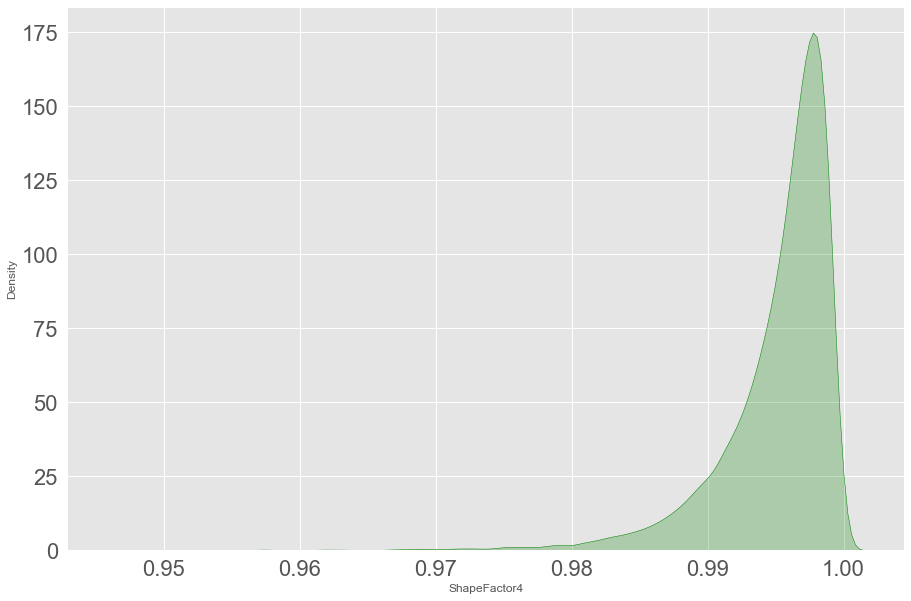

In [14]:
# Shape factor 4 density plot
fig, ax = plt.subplots(figsize = (15, 10))
sns.set(font_scale = 2)
plt.style.use("ggplot")
sns.kdeplot(df_bean["ShapeFactor4"], shade = True, color = "green")

<AxesSubplot:xlabel='Class', ylabel='count'>

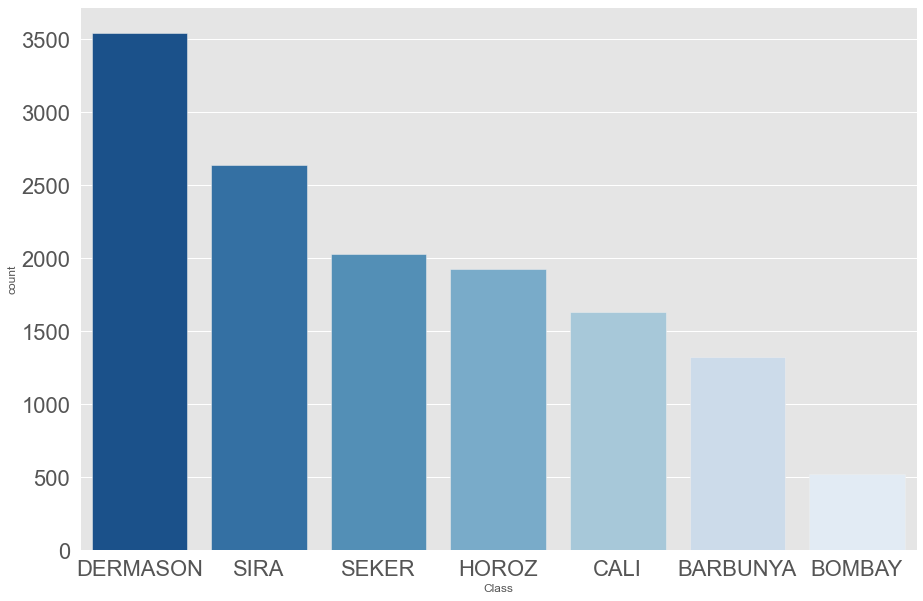

In [15]:
# Class count plot
df_bean_ord = df_bean["Class"].value_counts().sort_values(ascending = False).index
fig, ax = plt.subplots(figsize = (15, 10))
sns.set(font_scale = 2)
plt.style.use("ggplot")
sns.countplot(x = df_bean["Class"], palette = "Blues_r", order = df_bean_ord)

In [16]:
# Separating target variable from others variables
features = df_bean.drop("Class", axis = 1)
targetvariable = df_bean["Class"]
print(features)

        Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      28395    610.291       208.178117       173.888747      1.197191   
1      28734    638.018       200.524796       182.734419      1.097356   
2      29380    624.110       212.826130       175.931143      1.209713   
3      30008    645.884       210.557999       182.516516      1.153638   
4      30140    620.134       201.847882       190.279279      1.060798   
...      ...        ...              ...              ...           ...   
13606  42097    759.696       288.721612       185.944705      1.552728   
13607  42101    757.499       281.576392       190.713136      1.476439   
13608  42139    759.321       281.539928       191.187979      1.472582   
13609  42147    763.779       283.382636       190.275731      1.489326   
13610  42159    772.237       295.142741       182.204716      1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0          0.54981

In [17]:
# Creating training and test data
featureTrain, featureTest, targetTrain, targetTest = train_test_split(features, targetvariable, test_size = 0.3, random_state = 0)

In [18]:
# Creating decision tree object
clf = DecisionTreeClassifier(max_depth = 8)
print(clf)

DecisionTreeClassifier(max_depth=8)


In [19]:
# training Ml model in training data and predicting in test data
modelo = clf.fit(featureTrain, targetTrain)
previsoes = modelo.predict(featureTest)

In [20]:
# Showing results of the Decision tree model
print(classification_report(targetTest, previsoes))
print (confusion_matrix(targetTest, previsoes))
print (accuracy_score(targetTest, previsoes))

              precision    recall  f1-score   support

    BARBUNYA       0.85      0.88      0.87       389
      BOMBAY       1.00      0.99      0.99       134
        CALI       0.90      0.88      0.89       501
    DERMASON       0.89      0.93      0.91      1057
       HOROZ       0.94      0.93      0.94       594
       SEKER       0.94      0.93      0.94       579
        SIRA       0.87      0.84      0.85       830

    accuracy                           0.90      4084
   macro avg       0.91      0.91      0.91      4084
weighted avg       0.90      0.90      0.90      4084

[[342   0  26   0   4   4  13]
 [  2 132   0   0   0   0   0]
 [ 50   0 439   0   8   2   2]
 [  0   0   0 986   3  21  47]
 [  2   0  16   4 551   0  21]
 [  3   0   0  12   1 539  24]
 [  1   0   6 101  17   7 698]]
0.9027913809990206


In [21]:
# Creating random forest object and training the model
random_forest = RandomForestClassifier(n_estimators=300, bootstrap=True, random_state=42)
random_forest.fit(featureTrain, targetTrain)

RandomForestClassifier(n_estimators=300, random_state=42)

In [22]:
# predicting the test data
random_forest_predict = random_forest.predict(featureTest)

In [23]:
# Showing the results of random forest model
print(classification_report(targetTest, random_forest_predict))
print(confusion_matrix(targetTest, random_forest_predict))
print(accuracy_score(targetTest, random_forest_predict))

              precision    recall  f1-score   support

    BARBUNYA       0.95      0.91      0.93       389
      BOMBAY       1.00      1.00      1.00       134
        CALI       0.93      0.94      0.93       501
    DERMASON       0.91      0.94      0.92      1057
       HOROZ       0.95      0.95      0.95       594
       SEKER       0.95      0.96      0.95       579
        SIRA       0.88      0.86      0.87       830

    accuracy                           0.93      4084
   macro avg       0.94      0.94      0.94      4084
weighted avg       0.93      0.93      0.93      4084

[[353   0  22   0   2   2  10]
 [  0 134   0   0   0   0   0]
 [ 16   0 470   0  10   2   3]
 [  0   0   0 991   1  17  48]
 [  1   0  11   3 563   0  16]
 [  1   0   0   5   0 554  19]
 [  2   0   2  88  14   8 716]]
0.9258080313418218


In [24]:
# Creating KNN object
neighbor = KNeighborsClassifier(n_neighbors = 4)

In [25]:
# Training data with the model
neighbor.fit(featureTrain, targetTrain)

KNeighborsClassifier(n_neighbors=4)

In [26]:
# predicting with the data
neighbor_predict = neighbor.predict(featureTest)

In [27]:
# Showing the results with the KNN model
print(confusion_matrix(targetTest, neighbor_predict))
print(classification_report(targetTest, neighbor_predict))
print(accuracy_score(targetTest, neighbor_predict))

[[236   0 100   0  41   0  12]
 [  0 133   1   0   0   0   0]
 [195   0 273   0  31   1   1]
 [  0   0   0 972   1  47  37]
 [ 60   0  26  16 404   0  88]
 [  1   0   0 130   8 352  88]
 [  4   0   0 104  82  63 577]]
              precision    recall  f1-score   support

    BARBUNYA       0.48      0.61      0.53       389
      BOMBAY       1.00      0.99      1.00       134
        CALI       0.68      0.54      0.61       501
    DERMASON       0.80      0.92      0.85      1057
       HOROZ       0.71      0.68      0.70       594
       SEKER       0.76      0.61      0.68       579
        SIRA       0.72      0.70      0.71       830

    accuracy                           0.72      4084
   macro avg       0.74      0.72      0.72      4084
weighted avg       0.73      0.72      0.72      4084

0.7215964740450539


In [28]:
# Creating function to create a plot with the best neighbors quantity
error_rate = []

for i in range(1,40):
    neighbor = KNeighborsClassifier(n_neighbors = i)
    neighbor.fit(featureTrain, targetTrain)
    knnpredict = neighbor.predict(featureTest)
    error_rate.append(np.mean(knnpredict != targetTest))

Text(0, 0.5, 'Error Rate')

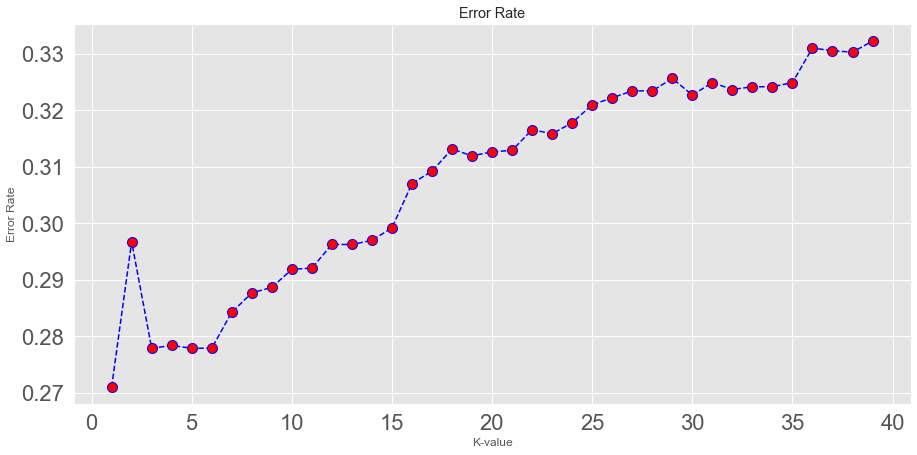

In [29]:
# creating the plot
plt.figure(figsize = (15,7))
plt.plot(range(1,40), error_rate, color = "blue", ls = "dashed", marker = "o", markerfacecolor = "red",
         markersize = 10)
plt.title("Error Rate")
plt.xlabel("K-value")
plt.ylabel("Error Rate")

In [30]:
# using the best neighbors quantity
neighbor = KNeighborsClassifier(n_neighbors=1)
neighbor.fit(featureTrain, targetTrain)
knnpredict = neighbor.predict(featureTest)

In [31]:
# showing the results
print(confusion_matrix(targetTest, neighbor_predict))
print(classification_report(targetTest, neighbor_predict))
print(accuracy_score(targetTest, neighbor_predict))

[[236   0 100   0  41   0  12]
 [  0 133   1   0   0   0   0]
 [195   0 273   0  31   1   1]
 [  0   0   0 972   1  47  37]
 [ 60   0  26  16 404   0  88]
 [  1   0   0 130   8 352  88]
 [  4   0   0 104  82  63 577]]
              precision    recall  f1-score   support

    BARBUNYA       0.48      0.61      0.53       389
      BOMBAY       1.00      0.99      1.00       134
        CALI       0.68      0.54      0.61       501
    DERMASON       0.80      0.92      0.85      1057
       HOROZ       0.71      0.68      0.70       594
       SEKER       0.76      0.61      0.68       579
        SIRA       0.72      0.70      0.71       830

    accuracy                           0.72      4084
   macro avg       0.74      0.72      0.72      4084
weighted avg       0.73      0.72      0.72      4084

0.7215964740450539


In [32]:
# Creating SVC object
support = SVC(random_state = 0)

In [33]:
# training the model 
support.fit(featureTrain, targetTrain)

SVC(random_state=0)

In [34]:
# predicting data
support_predict = support.predict(featureTest)

In [35]:
# Showing the results
print(classification_report(targetTest, support_predict))
print(confusion_matrix(targetTest, support_predict))
print(accuracy_score(targetTest, support_predict))

              precision    recall  f1-score   support

    BARBUNYA       0.41      0.08      0.13       389
      BOMBAY       1.00      0.99      1.00       134
        CALI       0.61      0.86      0.71       501
    DERMASON       0.77      0.87      0.82      1057
       HOROZ       0.61      0.58      0.59       594
       SEKER       0.39      0.27      0.32       579
        SIRA       0.59      0.73      0.65       830

    accuracy                           0.64      4084
   macro avg       0.63      0.63      0.60      4084
weighted avg       0.61      0.64      0.61      4084

[[ 30   0 252   0  95   0  12]
 [  1 133   0   0   0   0   0]
 [ 25   0 431   0  43   0   2]
 [  0   0   0 920   0 106  31]
 [ 17   0  27  10 346  24 170]
 [  0   0   0 213  14 156 196]
 [  0   0   0  45  72 111 602]]
0.6410381978452497


In [36]:
# Creating table with all models accuracy, precision, recall and F1-score
report = [["Support Vector Machines", 0.64, 0.63, 0.63, 0.60], ["Random Forest", 0.92, 0.94, 0.94, 0.94], 
          ["K-nearest neighbor", 0.72, 0.74, 0.72, 0.72], ["Decision Tree", 0.90, 0.92, 0.91, 0.91]]
overall_result = pd.DataFrame(report, columns = ["Model", "Accuracy Score", "Precision", "Recall", "F1-score"])
overall_result.sort_values("Accuracy Score", ascending = False)

,Model,Accuracy Score,Precision,Recall,F1-score
1,Random Forest,0.92,0.94,0.94,0.94
3,Decision Tree,0.90,0.92,0.91,0.91
2,K-nearest neighbor,0.72,0.74,0.72,0.72
0,Support Vector Machines,0.64,0.63,0.63,0.60
